# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
#FLAG_OWN_REALTY
len(list(app_train["FLAG_OWN_REALTY"].unique())) <= 2

True

In [5]:
condition_col_name=[]
condition_col_name.append("FLAG_OWN_REALTY")
condition_col_name

['FLAG_OWN_REALTY']

In [6]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
for col in app_train.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [8]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內

#
# 從sklearn.preprocessing导入LabelEncoder函式
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

condition_col_name=[]

# 檢查每一個 column
for col in app_train.columns:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            condition_col_name.append(col)
            # 就做 Label Encoder, 以加入相關係數檢查
            #fit_transform()作用是拟合数据
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print(condition_col_name)

['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']


In [10]:
app_train["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [11]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED_ANOM']   #得到判斷app_train["DAYS_EMPLOYED"] == 365243是否為真的序列，但不是矩陣
                                  #可用list(app_train['DAYS_EMPLOYED_ANOM']  )得到矩陣

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8          True
9         False
10        False
11         True
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23         True
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
307481    False
307482    False
307483     True
307484    False
307485    False
307486    False
307487     True
307488    False
307489    False
307490    False
307491    False
307492    False
307493    False
307494    False
307495    False
307496    False
307497    False
307498    False
307499    False
307500    False
307501    False
307502    False
307503    False
307504    False
307505     True
307506    False
307507     True
307508    False
307509    False
307510    False
Name: DAYS_EMPLOYED_ANOM

In [12]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
"""
#单值替换
df.replace('?',np.nan)  #用np.nan替换dataframe中的？
df.replace({'?':'NA'})  #用字串NA替换替换dataframe中的？
"""
"""
参数inplace默认为False,只能在生成的新数据块中实现编辑效果，原來的dataframe不改變。
当inplace=True时执行内部编辑，不返回任何值，原本的dataframe會发生改变
"""

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [13]:
"""
df.corr() #相关系数矩阵，即给出了任意两个变量之间的相关系数
df.corr()['col1'] #只显示“col1”的series与其他的column之series的相关系数
df['col1'].corr(data['col2']) #两个感情色彩的相关系数
"""

"\ndf.corr() #相关系数矩阵，即给出了任意两个变量之间的相关系数\ndf.corr()['col1'] #只显示“col1”的series与其他的column之series的相关系数\ndf['col1'].corr(data['col2']) #两个感情色彩的相关系数\n"

In [14]:
#app_train.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
SK_ID_CURR,1.000000,-0.002108,0.001654,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,...,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659,0.001368
TARGET,-0.002108,1.000000,-0.030896,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,...,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930,-0.045987
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241544,-0.185850,...,-0.005190,-0.007308,0.055821,0.000453,-0.005118,-0.015296,-0.014369,-0.021962,-0.052494,-0.054967
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141588,0.120310,...,0.002184,0.007299,0.006741,0.002669,0.000572,0.000242,0.020477,-0.009936,-0.036345,-0.154778
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.002817,1.000000,-0.002366,0.002934,-0.039270,-0.005225,-0.045537,...,-0.019364,-0.025130,-0.000173,-0.004120,-0.009267,0.007474,-0.004480,0.015451,0.067451,0.070107
CNT_CHILDREN,-0.001129,0.019187,0.029998,0.102023,-0.002366,1.000000,0.012882,0.002145,0.021374,-0.001827,...,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550,-0.240722
AMT_INCOME_TOTAL,-0.001820,-0.003982,-0.003531,0.083383,0.002934,0.012882,1.000000,0.156870,0.191657,0.159610,...,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690,-0.064038
AMT_CREDIT,-0.000343,-0.030369,-0.221648,0.116225,-0.039270,0.002145,0.156870,1.000000,0.770138,0.986968,...,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448,-0.065594
AMT_ANNUITY,-0.000433,-0.012817,-0.241544,0.141588,-0.005225,0.021374,0.191657,0.770138,1.000000,0.775109,...,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320,-0.103608
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.185850,0.120310,-0.045537,-0.001827,0.159610,0.986968,0.775109,1.000000,...,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998,-0.063569


In [16]:
"""
df.corr() #相关系数矩阵，即给出了任意两个变量之间的相关系数
df.corr()['col1'] #只显示“col1”的series与其他的column之series的相关系数
df['col1'].corr(data['col2']) #两个感情色彩的相关系数
"""

# 觀察相關係數
##只显示'TARGET'的series与其他的column之series的相关系数
TARGET_corr=app_train.corr()['TARGET']
TARGET_corr

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


In [20]:
#TARGET_corr不是dataframe，因此要改成dataframe
#corrdf = pd.DataFrame(TARGET_corr.values,TARGET_corr.index, columns = ['corr'])
TARGET_corr_df=pd.DataFrame(TARGET_corr.values,TARGET_corr.index, columns = ['corr'])
TARGET_corr_df

,corr
SK_ID_CURR,-0.002108
TARGET,1.000000
NAME_CONTRACT_TYPE,-0.030896
FLAG_OWN_CAR,-0.021851
FLAG_OWN_REALTY,-0.006148
CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,-0.003982
AMT_CREDIT,-0.030369
AMT_ANNUITY,-0.012817
AMT_GOODS_PRICE,-0.039645


In [ ]:
"""
TARGET=Target variable (1 - client with payment difficulties: he/she had late payment more than X days 
       TARGET=1代表有還債困難
       
DAYS_EMPLOYED=How many days before the application the person started current employment
       DAYS_EMPLOYED代表申請人在申請貸款幾天前就業

DAYS_LAST_PHONE_CHANGE=How many days before application did client change phone
       申請人在申請貸款幾天前換電話
"""

In [28]:
"""
由此可知，與TARGET最有關係的是
DAYS_EMPLOYED -->0.074
 
DAYS_LAST_PHONE_CHANGE-->0.055 
"""

TARGET_corr_df.sort_values(by='corr',ascending=False)
 

,corr
TARGET,1.000000
DAYS_EMPLOYED,0.074958
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055218
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994
FLAG_EMP_PHONE,0.045982
REG_CITY_NOT_LIVE_CITY,0.044395
FLAG_DOCUMENT_3,0.044346


In [33]:
TARGET_corr_df.loc[['OWN_CAR_AGE'],:]

,corr
OWN_CAR_AGE,0.037612


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [21]:
TARGET_corr.dtypes  #TARGET_corr是一連串float64的字串(元祖)，不是矩陣

dtype('float64')

In [26]:
TARGET_corr_array=list(TARGET_corr)  #利用list改成矩陣
TARGET_corr_array

[-0.0021084690182032236,
 1.0,
 -0.030895908161216207,
 -0.021850938463875168,
 -0.006148387704583926,
 0.019187133596327993,
 -0.003981865601221981,
 -0.03036928646150375,
 -0.012816561515431712,
 -0.039645281169414404,
 -0.03722714854256482,
 -0.07823930831003195,
 0.07495845742555217,
 0.04197486283152581,
 0.05145717260719229,
 0.03761156427512843,
 0.0005343955790302037,
 0.04598221971656028,
 0.028524322363399968,
 0.0003701268023512289,
 -0.023806272330580556,
 -0.0017583834312668411,
 0.009307784396530822,
 0.058899014945840766,
 0.060892667564898695,
 -0.02416583143016718,
 0.005575944520953251,
 0.006941907545423441,
 0.00281947918418061,
 0.04439537480589986,
 0.050994464367959576,
 0.03251834110161418,
 -0.15531712606409276,
 -0.1604716716054463,
 -0.17891869762805598,
 -0.02949756463337797,
 -0.022745743190108993,
 -0.009727673268681784,
 -0.022149284063369194,
 -0.018549661629742864,
 -0.034198793675268006,
 -0.019172182012742896,
 -0.044003370532464434,
 -0.0336135032519

In [25]:
TARGET_corr.values   #叫出來就是array

array([-2.10846902e-03,  1.00000000e+00, -3.08959082e-02, -2.18509385e-02,
       -6.14838770e-03,  1.91871336e-02, -3.98186560e-03, -3.03692865e-02,
       -1.28165615e-02, -3.96452812e-02, -3.72271485e-02, -7.82393083e-02,
        7.49584574e-02,  4.19748628e-02,  5.14571726e-02,  3.76115643e-02,
        5.34395579e-04,  4.59822197e-02,  2.85243224e-02,  3.70126802e-04,
       -2.38062723e-02, -1.75838343e-03,  9.30778440e-03,  5.88990149e-02,
        6.08926676e-02, -2.41658314e-02,  5.57594452e-03,  6.94190755e-03,
        2.81947918e-03,  4.43953748e-02,  5.09944644e-02,  3.25183411e-02,
       -1.55317126e-01, -1.60471672e-01, -1.78918698e-01, -2.94975646e-02,
       -2.27457432e-02, -9.72767327e-03, -2.21492841e-02, -1.85496616e-02,
       -3.41987937e-02, -1.91721820e-02, -4.40033705e-02, -3.36135033e-02,
       -1.08848227e-02, -2.50305333e-02, -3.29971175e-02, -3.17610752e-03,
       -1.35780698e-02, -2.72838707e-02, -1.99522839e-02, -9.03644735e-03,
       -2.20682038e-02, -

In [27]:
TARGET_corr.index

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=110)

In [34]:
#TARGET_corr是一連串float64的字串(元祖)，不是矩陣
#把 TARGET_corr改成dataframe型態
corrdf = pd.DataFrame(TARGET_corr.values,TARGET_corr.index, columns = ['corr'])
corrdf 

,corr
SK_ID_CURR,-0.002108
TARGET,1.000000
NAME_CONTRACT_TYPE,-0.030896
FLAG_OWN_CAR,-0.021851
FLAG_OWN_REALTY,-0.006148
CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,-0.003982
AMT_CREDIT,-0.030369
AMT_ANNUITY,-0.012817
AMT_GOODS_PRICE,-0.039645


In [35]:
# 後十五筆
corrdf.sort_values(by=['corr']).head(15)

,corr
EXT_SOURCE_3,-0.178919
EXT_SOURCE_2,-0.160472
EXT_SOURCE_1,-0.155317
DAYS_BIRTH,-0.078239
DAYS_EMPLOYED_ANOM,-0.045987
FLOORSMAX_AVG,-0.044003
FLOORSMAX_MEDI,-0.043768
FLOORSMAX_MODE,-0.043226
AMT_GOODS_PRICE,-0.039645
REGION_POPULATION_RELATIVE,-0.037227


In [36]:
# 前十五筆
#ascending = False讓排列前後顛倒
corrdf.sort_values(by=['corr'],ascending = False).head(15)

,corr
TARGET,1.000000
DAYS_EMPLOYED,0.074958
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055218
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994
FLAG_EMP_PHONE,0.045982
REG_CITY_NOT_LIVE_CITY,0.044395
FLAG_DOCUMENT_3,0.044346


In [37]:
app_train['DAYS_LAST_PHONE_CHANGE'].isnull().sum()  #如果不為0，代表有NaN

1

In [42]:
#list(app_train['DAYS_LAST_PHONE_CHANGE']!=np.nan) -->每個參數是否為NaN之布林值T或F的矩陣
test1_df=app_train[list(app_train['DAYS_LAST_PHONE_CHANGE']!=np.nan)]
test1_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.000,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,0,F,0,0,0,270000.000,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,1,M,1,1,0,67500.000,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,0,F,0,1,0,135000.000,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,M,0,1,0,121500.000,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
5,100008,0,0,M,0,1,0,99000.000,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,False
6,100009,0,0,F,1,1,1,171000.000,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,False
7,100010,0,0,M,1,1,0,360000.000,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
8,100011,0,0,F,0,1,0,112500.000,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,True
9,100012,0,1,M,0,1,0,135000.000,405000.0,20250.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False


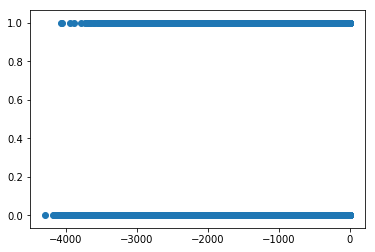

In [43]:
"""
# 畫散佈圖
# 但直接畫散布圖 - 看不出任何趨勢或形態
"""
plt.scatter(test1_df.DAYS_LAST_PHONE_CHANGE, test1_df.TARGET)

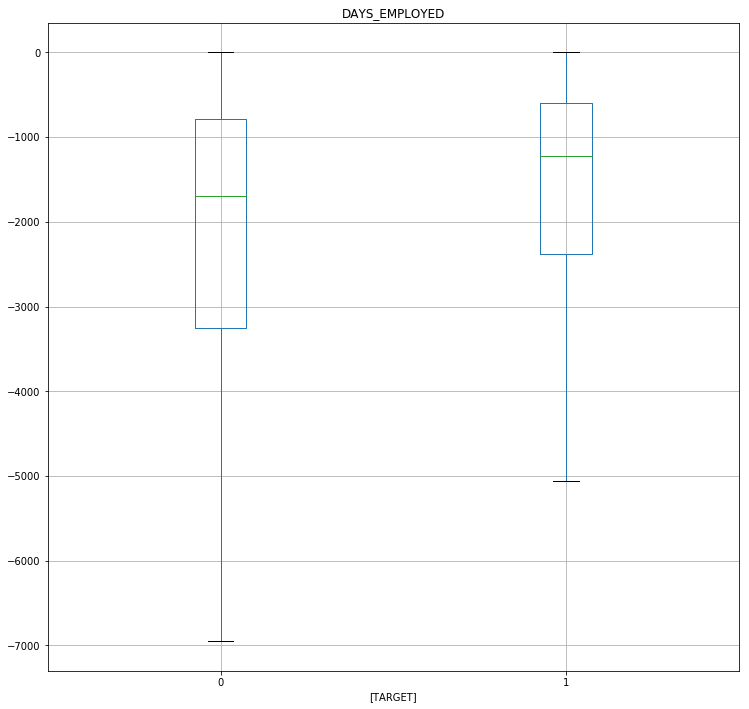

In [52]:
"""
plt_column = ['TARGET'] --->y軸值
plt_by = ['DAYS_LAST_PHONE_CHANGE']-->x軸值

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()
"""
"""
雇用日距離申請貸款時間與TARGET相關性正的很高
雇用日距離申請貸款時間近的，TARGET越可能為1(可能還不出錢)
"""
plt_column = ['DAYS_EMPLOYED']              #-->y軸值
plt_by =     ['TARGET']  #-->x軸值

test1_df.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

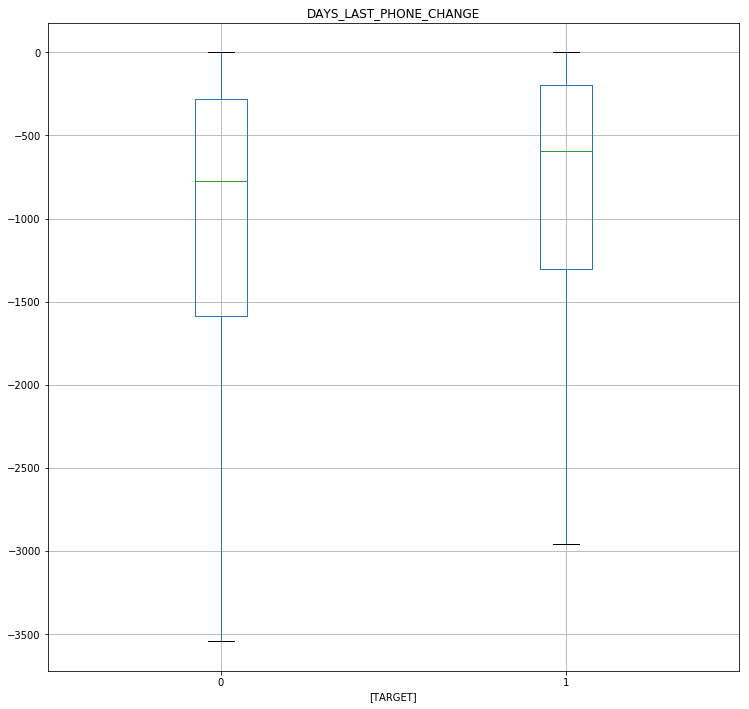

In [53]:
"""
上次購買手機日期距離申請貸款時間與TARGET相關性正的很高
上次購買手機日期距離申請貸款時間近的，TARGET越可能為1(可能還不出錢)
"""

plt_column = ['DAYS_LAST_PHONE_CHANGE']              #-->y軸值
plt_by =     ['TARGET']  #-->x軸值

test1_df.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

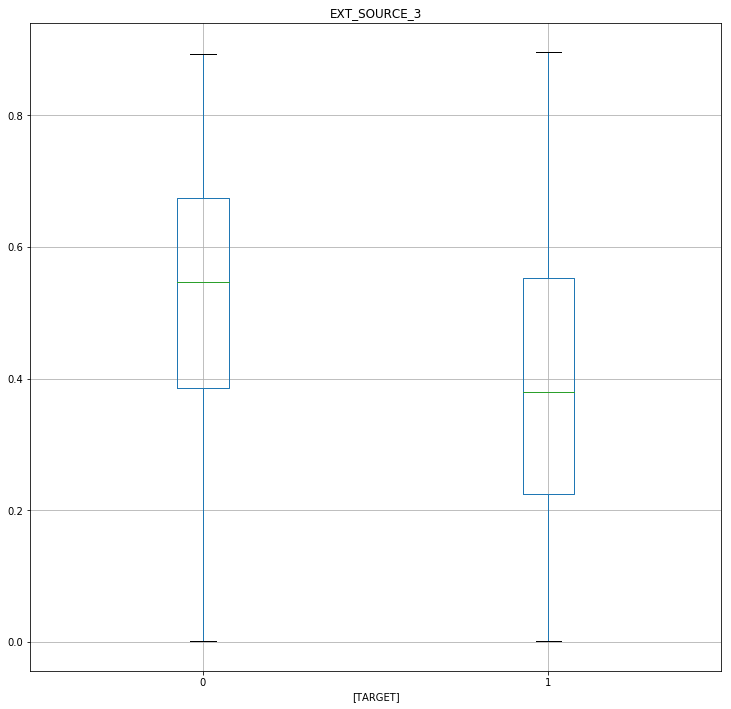

In [49]:
#EXT_SOURCE_3這個分數與'TARGET'之相關性負的很高
#EXT_SOURCE_3這個分數低，TARGET越可能為1(可能還不出錢)

plt_column = ['EXT_SOURCE_3']              #-->y軸值
plt_by =     ['TARGET']  #-->x軸值

test1_df.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()